NAME: ***Harsha Joshi*** <br>
STUDENT ID: ***45561623***   <br>
DATA2001 ASSIGNMENT 2 <br>

# DATA2001 Assignment 2 (Weight: 25%)


The aim of this assignment is to gain practical experience in analysing unstructured data.
You should only submit your completed Jupyter notebook in .ipynb format via Blackboard, including written answers in markdown and results from executed code cells.


The assignment comprises 5 main tasks: Data Exploration, Data Preprocessing, Model Training, Model Evaluation, and Model Analysis. You will address and compare two tasks: sentiment analysis and rating prediction.


The dataset you will work with in this assignment comprises text reviews about various android applications and their corresponding ratings. Further information about the dataset can be found [here](https://huggingface.co/datasets/sealuzh/app_reviews).


# Preprocessing Data through EDA

An EDA is conducted on the data to determine any issues before answering the questions stated in each of the tasks.

In [1]:
# import pandas library 
import pandas as pd

# import numpy and matplotlib
import numpy as np

import matplotlib.pyplot as plt

# load the data
app_data = pd.read_csv(filepath_or_buffer = 'app_review.csv')

# Find the total number of rows
total_rows = app_data.shape[0]
print("Total number of rows:", total_rows)

# Find the total number of columns
total_cols = app_data.shape[1]
print("Total number of columns:", total_cols)

# View first few rows of data
app_data.head(20)

Total number of rows: 57613
Total number of columns: 2


,Review,Rating
0,Thanks a lot I feel very good when i have down...,1
1,Its worst,1
2,Used too much space,1
3,Doesn't work a bit on my moto g,1
4,Hate it This does not work,1
5,Can't log in Fully foul. Can't access my any o...,1
6,No pin or pattern use,1
7,Please add the ability to delete this app from...,1
8,It might be a good app BUT: It doesn't work on...,1
9,I use to love it!!! This WAS the only app I wo...,1


In [2]:
# Calculate the number of null values
app_data.isna().sum()

Review    5
Rating    0
dtype: int64

**OBSERVATION**: <br>
Since "Review" is a non-numerical value, mean imputation cannot be conducted.

### Univariate EDA

In [3]:
# shape of the data
app_data.shape

(57613, 2)

In [4]:
# concise summary of the dataset
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57613 entries, 0 to 57612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  57608 non-null  object
 1   Rating  57613 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 900.3+ KB


In [5]:
# summarise Alcohol
app_data["Rating"].describe()

count    57613.000000
mean         4.016298
std          1.455702
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [6]:
# view unique Alcohol values
app_data["Rating"].unique()

array([1, 2, 3, 4, 5])

<Axes: title={'center': 'Distribution of Rating'}, ylabel='Frequency'>

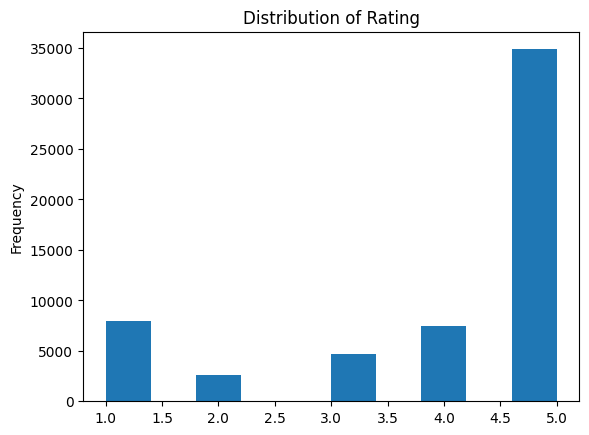

In [7]:
# histogram of 'Rating'
app_data["Rating"].plot.hist(grid=False, bins=10, title="Distribution of Rating")

<Axes: title={'center': 'Distribution of Rating'}>

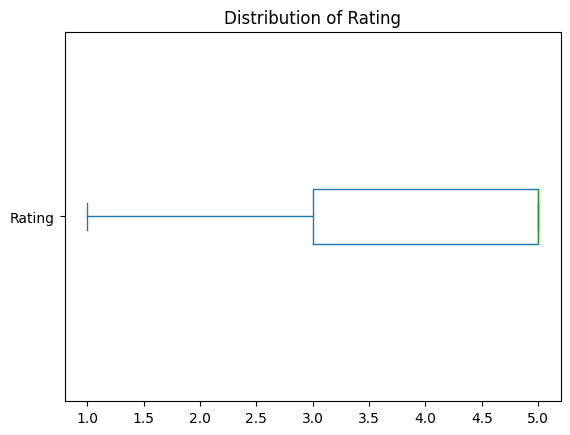

In [8]:
# boxplot of 'Rating'
app_data["Rating"].plot.box(vert = False, title = "Distribution of Rating")

<Axes: title={'center': 'Proportion of different Ratings'}, ylabel='count'>

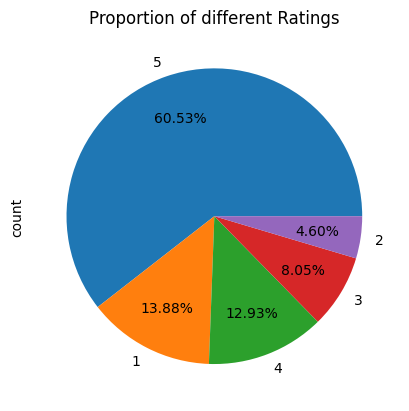

In [9]:
# distribution of the 'Rating' column values
rating_distribution = app_data["Rating"].value_counts()
rating_distribution

# make a pie chart
rating_distribution.plot.pie(autopct='%1.2f%%', pctdistance=0.7, radius=1, title="Proportion of different Ratings")

## Task 1: Data Exploration


1. **Load the dataset from the file "app_review.csv". How many records does the dataset contain? How many distinct classes are there in the dataset? Randomly select and print 5 reviews with a rating of '1' and 5 reviews with a rating of '5'.**

In [10]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [11]:
# Provide your answers here
!pip install nltk

import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s4556162/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/s4556162/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/s4556162/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# load the data 
app_data = pd.read_csv("app_review.csv")

#view the first few rows of the data
app_data.head(10)

,Review,Rating
0,Thanks a lot I feel very good when i have down...,1
1,Its worst,1
2,Used too much space,1
3,Doesn't work a bit on my moto g,1
4,Hate it This does not work,1
5,Can't log in Fully foul. Can't access my any o...,1
6,No pin or pattern use,1
7,Please add the ability to delete this app from...,1
8,It might be a good app BUT: It doesn't work on...,1
9,I use to love it!!! This WAS the only app I wo...,1


### How many records does the dataset contain? How many distinct classes are there in the dataset?

In [13]:
# Provide your answers here

# Calculate the number of records
num_records = len(app_data)
print(f'The dataset contains {num_records} records.')

# Calculate the number of distinct classes in the entire dataset
num_classes = app_data.nunique().sum()
print(f'The dataset contains {num_classes} distinct classes.')

The dataset contains 57613 records.
The dataset contains 47079 distinct classes.


### Randomly select and print 5 reviews with a rating of '1' and 5 reviews with a rating of '5'.

In [14]:
# Randomly select and print 5 reviews with rating '1' and 5 with rating '5'
rating_1_reviews = app_data[app_data['Rating'] == 1].sample(n=5)
rating_5_reviews = app_data[app_data['Rating'] == 5].sample(n=5)

# Print selected reviews
print("5 Reviews with Rating 1:")
print(rating_1_reviews['Review'].to_list())

print("\n5 Reviews with Rating 5:")
print(rating_5_reviews['Review'].to_list())

# Count the total number of reviews with Rating 1
rating_1_count = len(rating_1_reviews)

# Count the total number of reviews with Rating 5
rating_5_count = len(rating_5_reviews)

5 Reviews with Rating 1:
['it does not log in for a while  thefefore songs i played are not visible as data in my last. fm account.', 'Please help Cant root my Micromax A36', "It doesn't work.", "It's not much usefully if it doesn't have a voice calling option", 'Niraj Kumar Bharti Very useful this app for Android']

5 Reviews with Rating 5:
['Awesome  finally a cloudless remotecam! Kudos! Now I wish I had the knowledge/time to help you out with https/pgp... Big thanks  keep up the good work!', 'Amazing This is the best app for reading books from your smartphone', 'Its good', 'India ka', "Just what I needed It's simple and perfect."]


2. **Is the class distribution balanced? To support your answer, create a bar plot with the classes on the x-axis and the number of reviews in each class on the y-axis. Additionally, based on your observations of the reviews and the class distribution, determine whether there are more positive or negative reviews.**

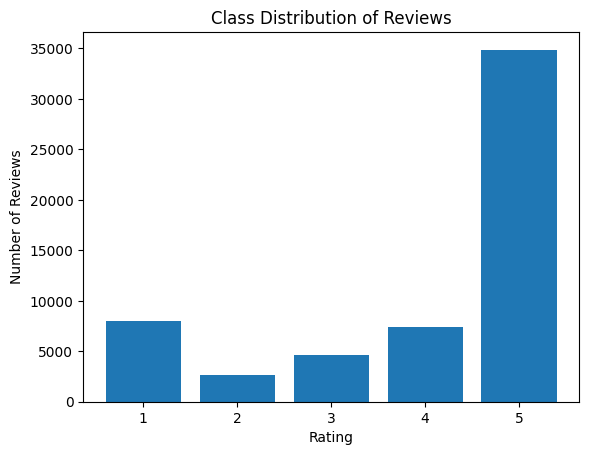

In [15]:
# Provide your answers here

# Get the word frequency
class_distribution = app_data['Rating'].value_counts().sort_index()

plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Class Distribution of Reviews')
plt.xticks([1, 2, 3, 4, 5])  # Assuming you have only '1' and '5' as ratings
plt.show()

**OBSERVATION**: <br>
It is assumed that 1-3 are classified as negative reviews, while 4-5 are classified as positive reviews. Visually looking at the graph, it is evident that there are more positive reviews than negative reviews. This is further supported by the pie chart in the EDA done before Task 1 whereby the total proportion of negative reviews is about 26.54%, while the positive reviews is significantly higher at 73.46%.

## Task 2: Data Preprocessing

- **Use the provided "clean_data" function to remove unnecessary symbols and clean the dataset.**



In [16]:
# Convert the app_data Review column into str types such that the data can be cleaned according to the function below
app_data['Review'] = app_data['Review'].astype(str)

In [17]:
app_data.head(15)

,Review,Rating
0,Thanks a lot I feel very good when i have down...,1
1,Its worst,1
2,Used too much space,1
3,Doesn't work a bit on my moto g,1
4,Hate it This does not work,1
5,Can't log in Fully foul. Can't access my any o...,1
6,No pin or pattern use,1
7,Please add the ability to delete this app from...,1
8,It might be a good app BUT: It doesn't work on...,1
9,I use to love it!!! This WAS the only app I wo...,1


In [18]:
# Using a sample value to demonstrate that the clean_data function does work.
app_data.loc[12, "Review"]

"Es muy mala •`_'•"

In [19]:
import re

def clean_data(text):

    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'br', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'•`  •', ' ', text)

    return text

In [20]:
# Provide your answers here

# Once code is written to remove hashtags and @mentions, apply the function to clean data.
app_data["Review"] = app_data["Review"].apply(clean_data)

In [34]:
# Confirm that the same data point has been cleaned
app_data.loc[12, "Review"]

'Es muy mala  '

- **Split the clean dataset into separate train and test sets. For this, use the "Review" field as the feature vector (X) and the "Rating" field as the label vector (Y).**

In [22]:
from sklearn.model_selection import train_test_split

In [35]:
# Provide your answers here

# define random state to make random processes reprodible
random_state = np.random.RandomState(0)

# define X (features) and Y (target)
X = app_data["Review"]
y = app_data["Rating"] #1, 2, 3, 4, 5

# split the data into train-test split where 30% of data will be used as test set
# splitting data for: 70% data for training and rest for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)


- **Transform the cleaned data into a numerical representation using Bag of Words (BoW) and remove any stop words. Save the BoW representation in the variables train_data_BOW and test_data_BOW.**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords
import nltk


nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s4556162/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/s4556162/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/s4556162/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
# Provide your answers here
from sklearn.feature_extraction.text import CountVectorizer

# define stop words 
stop_words = stopwords.words('english')

# define CountVectorizer object
# min_df=0.01 means words that belong to only 1% of the all Reviews will be excluded in the BOW
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=0.01)

# BOW demonstrates how frequently each word is seen, i.e, how many times a word appears
#  BOW for Training data
train_data_BOW = vectorizer.fit_transform(X_train)
test_data_BOW = vectorizer.transform(X_test)

In [39]:
print(train_data_BOW.shape)
print(test_data_BOW.shape)

(40329, 80)
(17284, 80)


## Task 3: Model Training

Define 2 Logistic Regression models: *model1* and *model2* and train the models as follows:
- **Train the first Logistic Regression model to predict the application rating (Y).**


In [43]:
from sklearn.linear_model import LogisticRegression

# Provide your answers here
# LOGISTIC REGRESSION : It is a popular algorithm for binary classification tasks,
                        # where it predicts the probability of an input belonging to a certain class.

# based on the BOW created above, see what is the nature of comments
# E.g according to BOW, if a certain negative word, say 'bad' appears many times, then
# Logistic Regreession would predict the nature of the comment to be negative

from sklearn.linear_model import LogisticRegression

# define logistic regression model object
log_reg = LogisticRegression()
model1 = LogisticRegression(random_state=random_state)

# Fit the model with the training data
log_reg.fit(train_data_BOW, y_train)
predict_result = log_reg.predict(test_data_BOW)

- **Create an additional binary label by assigning ‘1’ – positive for the product ratings 4 and 5; and "–1" for product ratings 1, 2 and 3. Store it in y_train_binary and y_test_binary.**

*Tip: you can use a function copy.deepcopy for creating a copy of label variables*

In [44]:
import copy

In [45]:
# Provide your answers here

# Create a deep copy of y_train and y_test
y_train_binary = copy.deepcopy(y_train)
y_test_binary = copy.deepcopy(y_test)

# Assign 1 for ratings 4 and 5
y_train_binary[(y_train == 4) | (y_train == 5)] = 1
y_test_binary[(y_test == 4) | (y_test == 5)] = 1

# Assign -1 for ratings 1, 2, and 3
y_train_binary[(y_train == 1) | (y_train == 2) | (y_train == 3)] = -1
y_test_binary[(y_test == 1) | (y_test == 2) | (y_test == 3)] = -1

In [47]:
# check if the bianry labels (-1 and 1) are now added instead of the old ratings (1, 2, 3, 4, 5)
print(len(y_train_binary))
print(len(y_test_binary))

40329
17284


In [48]:
y_train_binary.unique()

array([-1,  1])

In [49]:
y_train_binary.info()

<class 'pandas.core.series.Series'>
Index: 40329 entries, 7381 to 56422
Series name: Rating
Non-Null Count  Dtype
--------------  -----
40329 non-null  int64
dtypes: int64(1)
memory usage: 630.1 KB


- **Train the second Logistic Regression model to predict the binary sentiment label (Y_binary).**


In [50]:
# Provide your answers here
from sklearn.feature_extraction.text import CountVectorizer

stop_words = stopwords.words('english')

# define CountVectorizer object
# min_df=0.01 means words that belong to only 1% of the all Reviews will be excluded in the BOW
vectorizer2 = CountVectorizer(stop_words=stopwords.words('english'), min_df=0.01)

#  BOW for Training data
train_data_BOW2 = vectorizer2.fit_transform(X_train)
test_data_BOW2 = vectorizer2.transform(X_test)

In [51]:
# define logistic regression model object
log_reg2 = LogisticRegression()
model2 = LogisticRegression(random_state=random_state)

# Fit the model with the training data
log_reg2.fit(train_data_BOW2, y_train_binary)
predict_result2 = log_reg2.predict(test_data_BOW2)


- **Make and store predictions for both models**

In [64]:
# Provide your answers here

# Model 1's Predicted Result:
print("Model 1 Predictions:", len(predict_result))

# Model 2's Predicted Result:
print("Model 2 Predictions:", len(predict_result2))

Model 1 Predictions: 17284
Model 2 Predictions: 17284


**OBSERVATION** <br>
The stored predicted values for both Model 1 and Model 2 is 17284. <BR>


## Task 4: Model Evaluation

- **Compute and compare the test accuracy of Model 1 and Model 2. Based on your results, analyze which task is easier: binary sentiment prediction or multi-class rating prediction.**

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Provide your answers here

# To compute and compare the test accuracy of Model 1 (Logistic Regression with BoW representation)
# and Model 2 (Logistic Regression with TfIdf representation), use the accuracy_score function from the sklearn.metrics module. 

# Compute the test accuracy of Model 1
model1_accuracy = accuracy_score(y_test, predict_result)

# Compute the test accuracy of Model 2
model2_accuracy = accuracy_score(y_test, predict_result2)

print(f"Model 1 (Logistic Regression with BoW representation) test accuracy: {model1_accuracy:.4f}")
print(f"Model 2 (Logistic Regression with BoW representation) test accuracy: {model2_accuracy:.4f}")

Model 1 (Logistic Regression with BoW representation) test accuracy: 0.6397
Model 2 (Logistic Regression with BoW representation) test accuracy: 0.0892


**OBSERVATION** <br>
The test accuracy of Model 1 is 0.6397 and the test accuracy of Model 2 is 0.0892. <BR>
Therefore, it is concluded that Model 1 (Logistic Regression with BoW representation) yields higher performance in predicting the hotel ratings (Y) than Model 2 (Logistic Regression with BoW representation).



- **For Model 1,  compute additional evaluaton measures, namely confusion matrix, precision and recall.** 

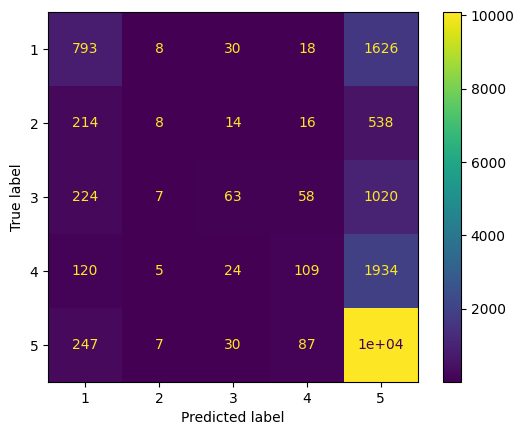

In [56]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute the confusion matrix
logistic_classes =['1','2','3','4','5']
cm = confusion_matrix(y_test, predict_result)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_classes)
display.plot();

**OBSERVATION** <br>
The above shown confusion matrix shows the accuracy of the predictions made by Model 1. <BR>
For example, (in top left corner), 214 samples were predicted to be label 1 but in reality, they were label 2.

In [57]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Compute the confusion matrix
cm = confusion_matrix(y_test, predict_result)

# Compute precision and recall
precision = precision_score(y_test, predict_result, average='weighted')

print("Precision of Model 1 =", precision)

Precision of Model 1 = 0.5618151946158507


**OBSERVATION** <BR> 
    
**Precision** is a measure of the accuracy of the model’s positive predictions. It is defined as the ratio of true positives (TP) to the sum of true positives and false positives (FP). In other words, precision is the proportion of positive predictions that are actually true. <BR>

                                            Precision = TP/(TP+FP)
    
* Precision of Model 1 is 0.5618151946158507. <BR>
This means that out of all the positive predictions made by Model 1, only 56.18% were actually true.

In [58]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Compute the confusion matrix
cm = confusion_matrix(y_test, predict_result)

# compute recall
recall = recall_score(y_test, predict_result, average='weighted')

print("Recall of Model 1 =", recall)

Recall of Model 1 = 0.6397246007868549


**OBSERVATION** <BR> <BR>
**Recall** is a measure of the completeness of the model’s positive predictions. It is defined as the ratio of true positives (TP) to the sum of true positives and false negatives (FN). In other words, recall is the proportion of actual positives that are correctly identified by the mode.

                                            Recall = TP/(TP+FN)  
* Recall of Model 1 is  0.6397246007868549 <BR>
This means that out of all the actual positive instances in the data, only 63.97% were correctly identified by Model 1.

- **Based on the confusion matrix obtained in the previous question (referring to Model 1, the Logistic Regression for rating prediction), identify and state the number of samples that were classified to have the rating of 1 (the lowest rating), but in reality, they had an actual rating of 5 (the highest rating).**

**ANSWER:**<br>
Based on the confusion matrix, **1626** samples were classified to have the rating of 5 (the highest rating), but in reality, they had an actual rating of 1 (the lowest rating).

## Task 5: Model Analysis



- **Discuss the importance of considering alternative evaluation measures, such as precision and recall, instead of relying solely on accuracy. Based on this discussion, identify the most suitable evaluation metric for Model 1.**

**ANSWER** <BR>
**Model evaluation metrics** are used to assess the performance of a machine learning model. **Accuracy** is one such metric that is commonly used to evaluate models. However, it is not always the most suitable metric for every problem. In some cases, it may be more appropriate to use **precision** and **recall** instead of accuracy.

**Precision** measures the proportion of true positives among all positive predictions made by the model. It is calculated as follows:

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$$

**Recall**, on the other hand, measures the proportion of true positives among all actual positive instances in the data. It is calculated as follows:

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

In some cases, it may be more important to optimize for precision or recall instead of accuracy. For example, in a spam detection system, it may be more important to minimize false positives (i.e., classify an email as spam when it is not) than false negatives (i.e., classify a spam email as not spam). In such cases, precision would be a more suitable metric than accuracy.

For **Model 1**, which is a logistic regression model trained using the BoW representation to predict app ratings, it would be appropriate to consider alternative evaluation measures such as precision and recall in addition to accuracy. Since this is a multi-class classification problem, we can use the **macro-averaged F1 score** as an evaluation metric. The macro-averaged F1 score calculates the F1 score for each class separately and then takes the average across all classes. It is calculated as follows:

$$\text{Macro-averaged F1 score} = \frac{1}{k}\sum_{i=1}^{k}\frac{2\times\text{Precision}_i\times\text{Recall}_i}{\text{Precision}_i+\text{Recall}_i}$$

where $k$ is the number of classes.

The macro-averaged F1 score is a suitable evaluation metric for Model 1 because it takes into account both precision and recall and provides an overall measure of performance across all classes.

In [59]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Compute the confusion matrix
cm = confusion_matrix(y_test, predict_result)

# compute recall
f1_score = (2 * (precision * recall))/(precision + recall)

print("f1_score of Model 1 =", f1_score)

f1_score of Model 1 = 0.5982440239878299


**OBSERVATION** <BR> <BR>
**F1 Score** calculates the F1 score for each class separately and then takes the average across all classes. It takes into account both precision and recall and provides an overall measure of performance across all classes.

$$\text{F1 score} = \frac{2\times\text{Precision}\times\text{Recall}}{\text{Precision}+\text{Recall}}$$ 
* F1 Score of Model 1 is  0.5982440239878299 <BR>
This means the overall measure of performance accross all classes is 59.82% by Model 1.


- **For binary sentiment prediction (Model 2), visualize important words with their model coefficients.**  

*Tip: you can reuse the function plot_coefficients from prac. session.*

In [60]:
# Provide your answers here

def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

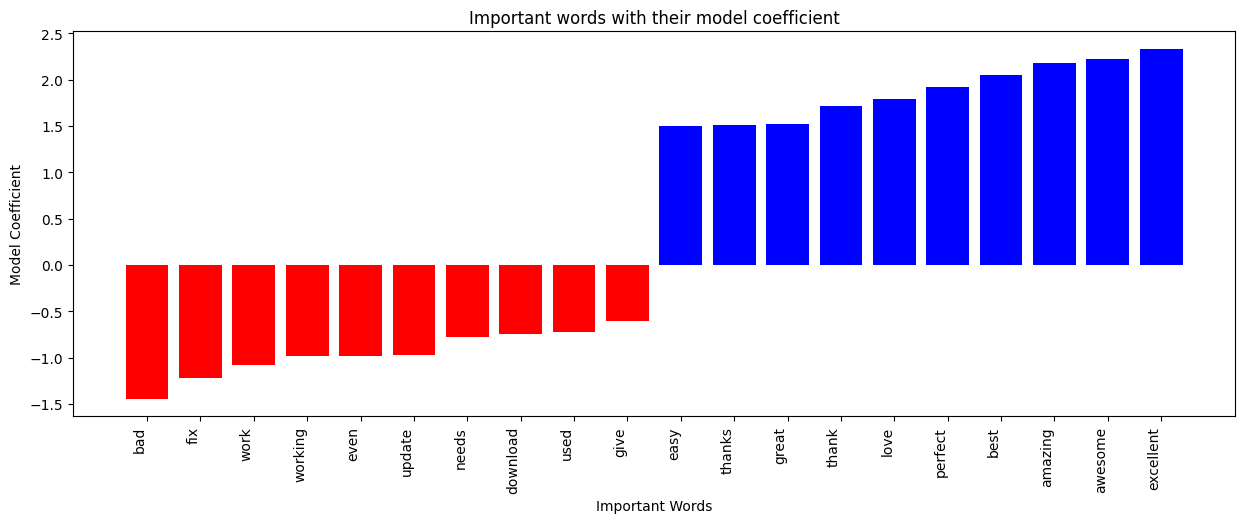

In [61]:
plot_coefficients(log_reg2, vectorizer.get_feature_names_out())

**OBSERVATION** <BR>
The plot shows 20 words which played important role in making predictions. The red bars show top 10 words with negative model coefficient and blue bars show top 10 words with positive model coefficient values.

- **Analyze the quality of the features produced by Model 2 by examining the words with the highest coefficients for both the positive and negative classes.  Identify any potential bias in the model, and explain how this bias could affect its performance.**

1. **Analysing Feature Quality:** <br>
By examining the words with the highest coefficients: <br>
- Positive Class: Words with high positive coefficients are associated with the positive class. These words should represent positively connotated language or expressions that indicate favorable sentiment. <br>
- Negative Class: Similarly, words with high negative coefficients are associated with the negative class. These words should reflect negative language, criticisms, or unfavorable sentiment. <br> </br>

2. **Potential Bias in the Model:** <br>
Bias in the model can stem from several sources, which could be reflected in the feature importance: <br>
- Class imbalance: If the training dataset is skewed toward one class (e.g., more positive than negative examples), the model may learn to assign disproportionately high weights to features associated with the dominant class. As a result, the model might overly rely on certain words for predictions, leading to biased classifications. <br>
- Contextual bias: Some words may have different meanings depending on context, but the model might treat them as always having a positive or negative connotation. For instance, words like "working" could be positive or negative depending on context ("working well" vs. "working bad"). The model may misinterpret these based on how frequently they appear with a certain sentiment in the training data. <br>
- Overfitting to specific features: The model may assign large coefficients to words that are common in the training set but not generalisable to unseen data. For example, if certain terms (e.g., "awesome") are very frequent in the training data but not in the broader population, the model could perform well on the training data but poorly on new, unseen examples. <br> </br>

3. **How Bias Could Affect Model Performance:** <br>
- False positives or false negatives: If the model relies too heavily on certain biased features, it might classify ambiguous or neutral text incorrectly. For example, if a word that is typically neutral (e.g., "thanks") has been over- or under-weighted due to bias in the training data, the model could incorrectly classify examples containing that word. <br>
- Misclassification in rare or minority contexts: The model may struggle with out-of-distribution data. For instance, if words associated with certain demographics or contexts (e.g., slang, regional terms) are underrepresented in the training data, the model could systematically misclassify text from those sources. <br>
- Generalisation issues: If the model overfits to certain terms or expressions that are common in the training set, it may fail to generalize well to other data, leading to lower accuracy in real-world scenarios. <br> </br>

4. **Conclusion:** <br>
To improve model performance and mitigate potential biases: <br>
- Consider rebalancing the dataset if there is class imbalance. <br>
- Implement techniques like context-aware embeddings (e.g., word vectors) to capture more nuanced meanings of words. <br>
- Regularisation methods can be employed to prevent overfitting and reduce the influence of individual words that may dominate the model.